In [82]:

# Importing Libraries
import ast
import seaborn as sns
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
ds = load_dataset('lukebarousse/data_jobs')
df = ds['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [83]:
df_sg = df[df['job_country'] == 'Singapore'].copy()

In [84]:
df_skills = df_sg.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
25,"Senior Officer, Data Analyst, GTO",sql
44,Binance Accelerator Program - Data Scientist (...,python
44,Binance Accelerator Program - Data Scientist (...,java
44,Binance Accelerator Program - Data Scientist (...,scala
82,Cbi Application Data Design Engineer,None
...,...,...
785736,DevOps Engineer,linux
785736,DevOps Engineer,unix
785736,DevOps Engineer,kubernetes
785736,DevOps Engineer,docker


In [85]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name= 'skill_count')

df_skills_count.sort_values(by= 'skill_count', ascending= False, inplace= True)

df_skills_count

,job_skills,job_title_short,skill_count
1185,sql,Data Analyst,3660
1186,sql,Data Engineer,3240
931,python,Data Engineer,3215
930,python,Data Analyst,3103
932,python,Data Scientist,2524
...,...,...,...
320,erlang,Data Engineer,1
296,dplyr,Data Engineer,1
1204,sqlite,Senior Data Analyst,1
285,dlib,Data Scientist,1


In [86]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

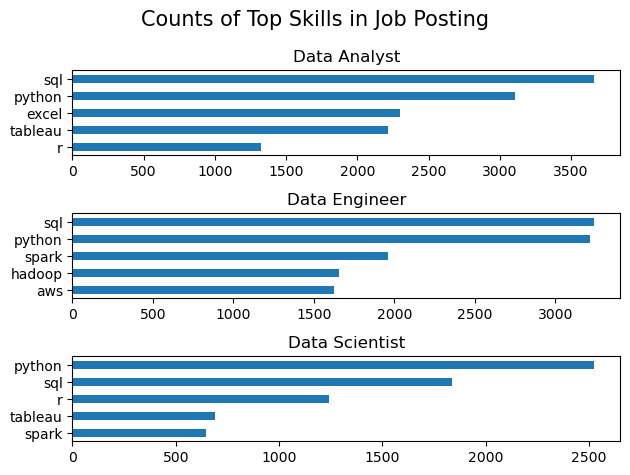

In [87]:
fig, ax = plt.subplots(len(job_titles), 1)

for index, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[index], title= job_title)
    ax[index].invert_yaxis()
    ax[index].set_ylabel('')
    ax[index].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Posting', fontsize = 15)
fig.tight_layout(h_pad=1)
plt.show()

In [91]:
df_job_total_count = df_sg['job_title_short'].value_counts().reset_index(name= 'jobs_total')

In [92]:
df_skills_count

,job_skills,job_title_short,skill_count
1185,sql,Data Analyst,3660
1186,sql,Data Engineer,3240
931,python,Data Engineer,3215
930,python,Data Analyst,3103
932,python,Data Scientist,2524
...,...,...,...
320,erlang,Data Engineer,1
296,dplyr,Data Engineer,1
1204,sqlite,Senior Data Analyst,1
285,dlib,Data Scientist,1


In [97]:
df_skills_perc = pd.merge(df_skills_count, df_job_total_count, how='left', on='job_title_short')

df_skills_perc['skills_percent'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skills_percent
0,sql,Data Analyst,3660,6632,55.186972
1,sql,Data Engineer,3240,5788,55.977885
2,python,Data Engineer,3215,5788,55.545957
3,python,Data Analyst,3103,6632,46.788299
4,python,Data Scientist,2524,3710,68.032345
...,...,...,...,...,...
1432,erlang,Data Engineer,1,5788,0.017277
1433,dplyr,Data Engineer,1,5788,0.017277
1434,sqlite,Senior Data Analyst,1,1134,0.088183
1435,dlib,Data Scientist,1,3710,0.026954


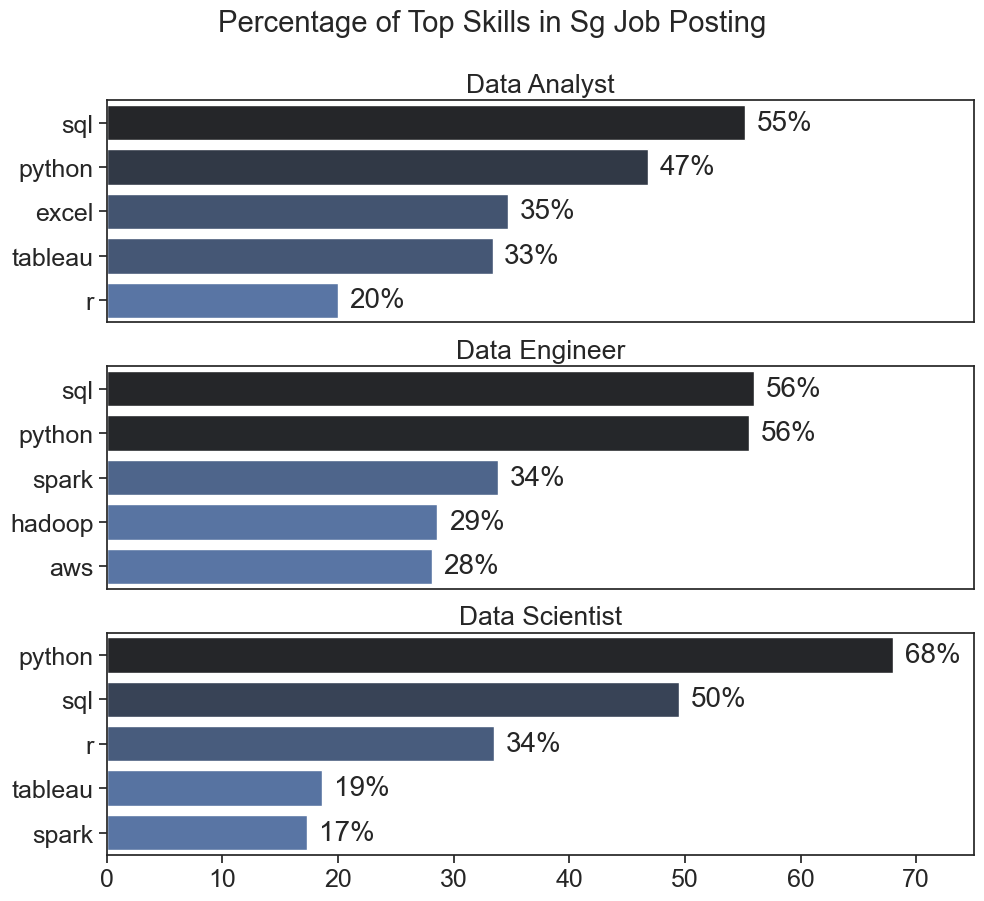

In [157]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(10, 9))

for index, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)

    # df_plot.plot(kind='barh', x='job_skills', y='skills_percent', ax=ax[index], title= job_title)
    sns.set_theme(style='ticks')
    sns.barplot(data=df_plot, x='skills_percent', y='job_skills', ax=ax[index], hue= 'skills_percent', palette= 'dark:b_r')
    ax[index].set_title(job_title, fontsize= 19)
    ax[index].set_xlabel('') 
    ax[index].set_xlim(0, 75)
    ax[index].set_ylabel('')
    ax[index].legend().set_visible(False)

    ax[index].tick_params(axis='x', labelsize=18)  # Increase x-axis font size
    ax[index].tick_params(axis='y', labelsize=18) 

    for i,v in enumerate(df_plot['skills_percent']):
        ax[index].text(v+1, i, f'{v:.0f}%', va='center', fontsize= 20)

    if index != len(job_titles) - 1:
        ax[index].set_xticks([])

fig.suptitle(
    'Percentage of Top Skills in Sg Job Posting', 
    fontsize=21, 
    y=1,  # Adjust vertical position
    x=0.5    # Ensure horizontal centering
)
fig.tight_layout(h_pad=1)
plt.show()